<a href="https://colab.research.google.com/github/rasika95-max/DAI-TUT1/blob/main/assignment_2_Rasika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [54]:
df=pd.read_csv(r"/content/tips (data for regression problem) - tips (data for regression problem).csv")

In [55]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Data Preparation

In [56]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [57]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [58]:
df.duplicated().sum()

1

In [59]:
df.shape

(244, 7)

In [60]:
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Exploratory Data Analysis

In [61]:
df_data = df.drop(columns=['tip'])
df_target = df['tip']

#our target variable is tip

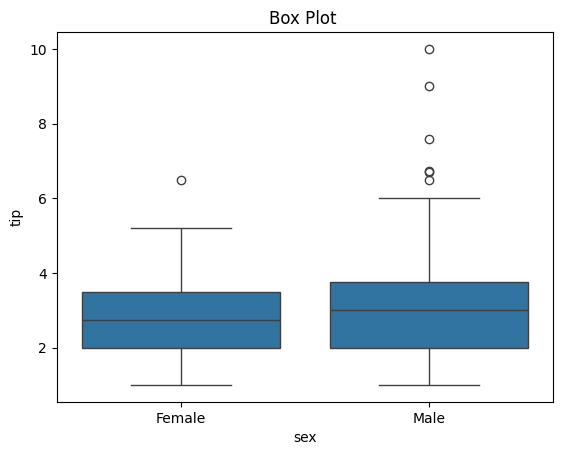

In [62]:
#Scatter plot
sns.boxplot(x='sex', y='tip', data=df)
plt.title("Box Plot ")
plt.show()


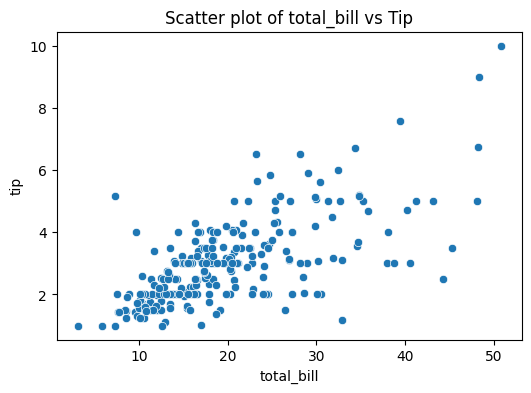

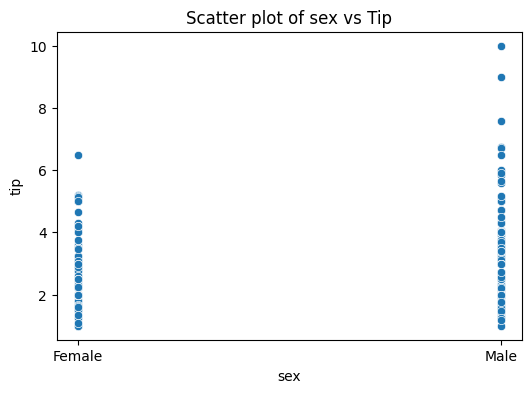

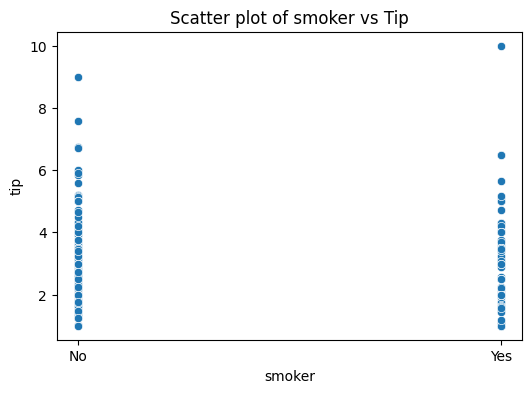

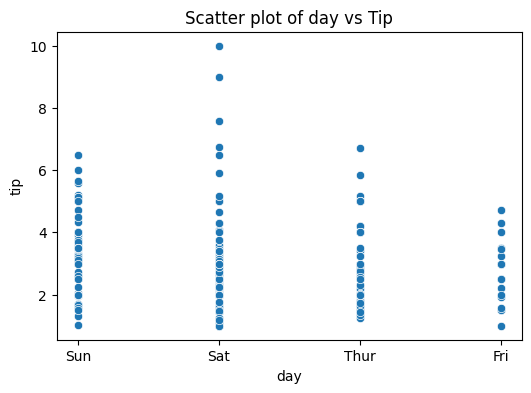

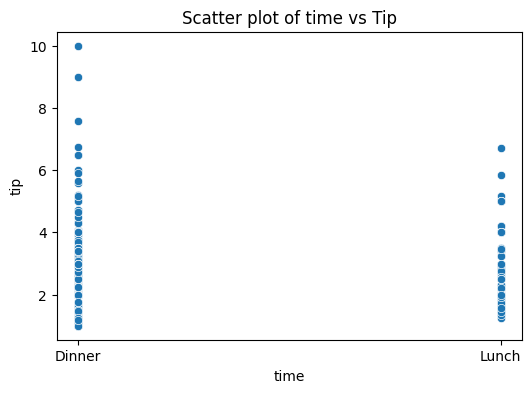

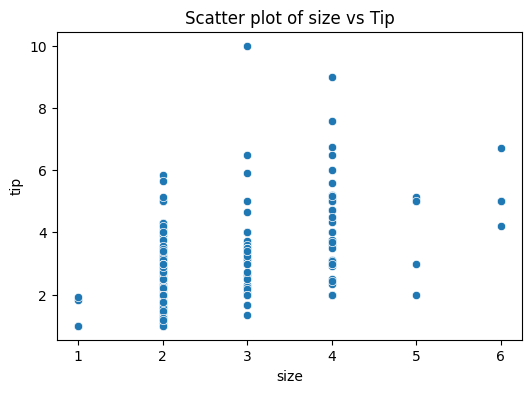

In [63]:
#scatter plot
for column in df.columns:
    if column != 'tip':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=column, y='tip')
        plt.title(f'Scatter plot of {column} vs Tip')
        plt.show()


In [64]:
#The tip amount generally increases with the total bill
#men tending to tip more than women
#Both smokers and non-smokers tip similarly, showing no significant difference in their average tip but there is more variance in non smokers giving tips
#The variance in tip amounts is most noticeable on Saturdays, while Sundays bring in the highest tip totals overall.
#Additionally, tips are generally higher during dinner compared to lunch.
#Table size 2-3 have given more number of tips relative to others while in table size 4 variance is significant.

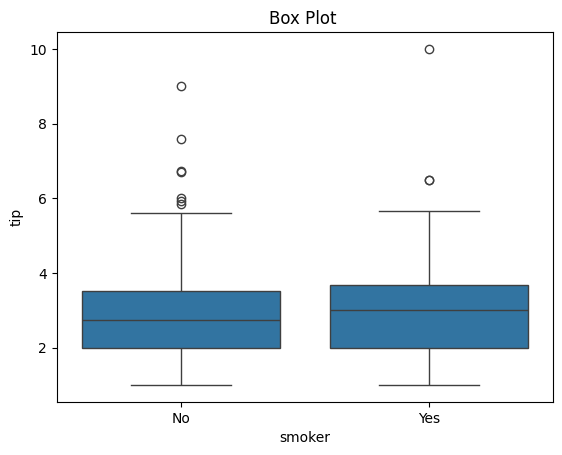

In [65]:
sns.boxplot(x='smoker', y='tip', data=df)
plt.title("Box Plot ")
plt.show()

In [66]:
#Through box plot we are getting more accurate information

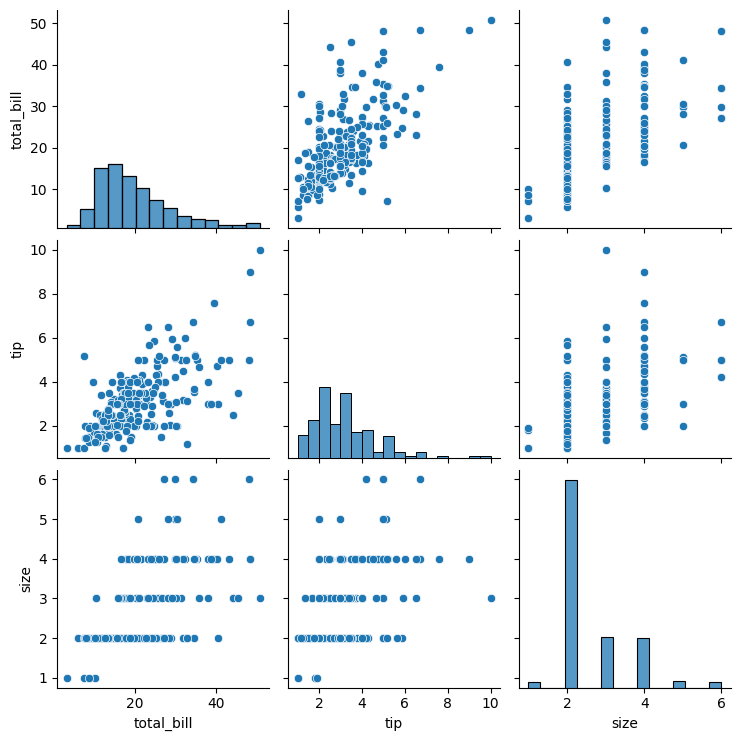

In [67]:
sns.pairplot(df)

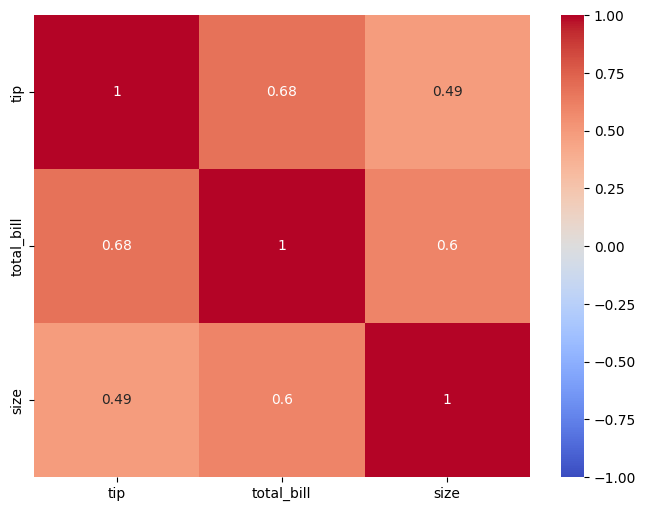

In [68]:
#correlation matrix
df_num= df[['tip','total_bill','size']]
correlation_matrix = df_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

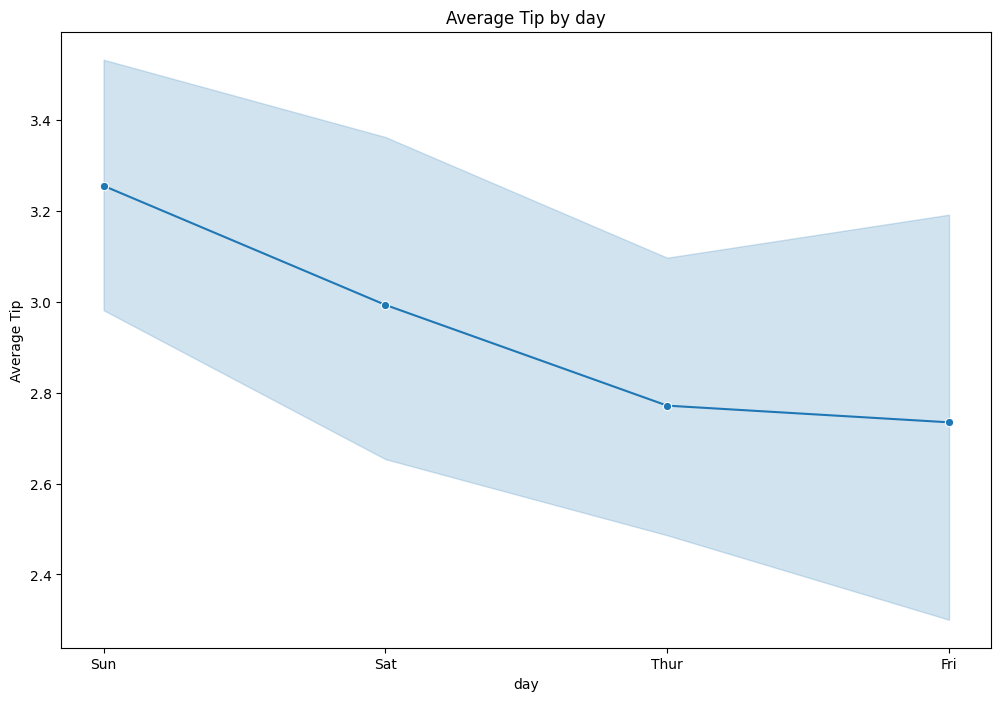

In [69]:
#Moderate positive correlation between totalbill and tip while comparitively weak correlatin between tip and size

# X_with_const = sm.add_constant(X)

# model = sm.OLS(y, X_with_const).fit()


# from statsmodels.stats.diagnostic import linear_rainbow
# rainbow_stat, rainbow_p_value = linear_rainbow(model)

# print("Rainbow test statistic:", rainbow_stat)
# print("Rainbow test p-value:", rainbow_p_value)
#Line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by day")
plt.xlabel("day")
plt.ylabel("Average Tip")
plt.show()

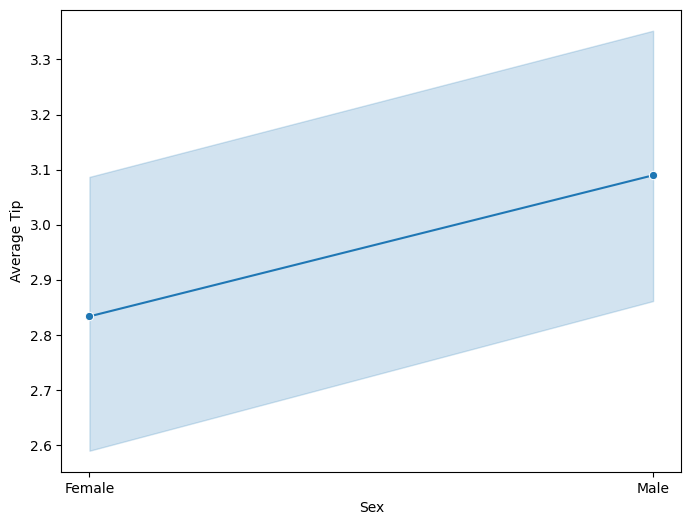

In [70]:
#tip has been given more on Sundays
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="sex", y="tip", estimator="mean", marker="o")
plt.xlabel("Sex")
plt.ylabel("Average Tip")
plt.show()

In [71]:
#some differnece between tips given by male and female

tips_data=pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X=tips_data.drop(["tip"],axis=1)
y=tips_data["tip"]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Regression Techniques**

Linear Regression

In [73]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear_reg))
mse_lr = mean_squared_error(y_test, y_pred_linear_reg)

print("Linear Regression :\nMSE:", mse_lr,  "\nRMSE:", np.sqrt(mse_lr))
mae = mean_absolute_error(y_test, y_pred_linear_reg)
print(f'Mean Absolute Error: {mae}')

Linear Regression R2: 0.43730181943482493
Linear Regression :
MSE: 0.7033566017436106 
RMSE: 0.8386635807900631
Mean Absolute Error: 0.6671331480264893


Lasso Regression

In [74]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error: {mae}')
print("Lasso Regression :\nMSE:", mse_lasso, "\nR2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Mean Absolute Error: 0.6623516945517064
Lasso Regression :
MSE: 0.6791265936812352 
R2: 0.45668627024964514 
RMSE: 0.8240913745946108


Ridge Regression

In [75]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Model Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression :\nMSE:", mse_ridge, "\nR2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))
mae = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error: {mae}')

Ridge Regression :
MSE: 0.7030754649160458 
R2: 0.4375267340527703 
RMSE: 0.8384959540248514
Mean Absolute Error: 0.667064553591509


Decision Tree Regression

In [76]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Model Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree :\nMSE:", mse_tree, "\nR2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))
mae = mean_absolute_error(y_test, y_pred_tree)
print(f'Mean Absolute Error: {mae}')

Decision Tree :
MSE: 1.2551938775510205 
R2: -0.004178121600921791 
RMSE: 1.120354353564541
Mean Absolute Error: 0.8295918367346939


Random Forest Regression

In [77]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Model Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest :\nMSE:", mse_forest, "\nR2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))
mae = mean_absolute_error(y_test, y_pred_forest)
print(f'Mean Absolute Error: {mae}')

Random Forest :
MSE: 0.9196720148979602 
R2: 0.2642455218065466 
RMSE: 0.9589953153680993
Mean Absolute Error: 0.7557163265306125


Support Vector Regression

In [78]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Model Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression :\nMSE:", mse_svr, "\nR2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))
mae = mean_absolute_error(y_test, y_pred_svr)
print(f'Mean Absolute Error: {mae}')

Support Vector Regression :
MSE: 0.6524534436627769 
R2: 0.47802527943520123 
RMSE: 0.8077459029068342
Mean Absolute Error: 0.648420983896765


KNN Regression

In [79]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Model Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors :\nMSE:", mse_knn, "\nR2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))
mae = mean_absolute_error(y_test, y_pred_knn)
print(f'Mean Absolute Error: {mae}')

K-Nearest Neighbors :
MSE: 0.8763725714285714 
R2: 0.29888587066985495 
RMSE: 0.9361477294896203
Mean Absolute Error: 0.718857142857143


Among all the abovel models, Lasso Regression Model is best bcz it has higher r2 score and comparitively lower MSE,MAE and RMSE value.

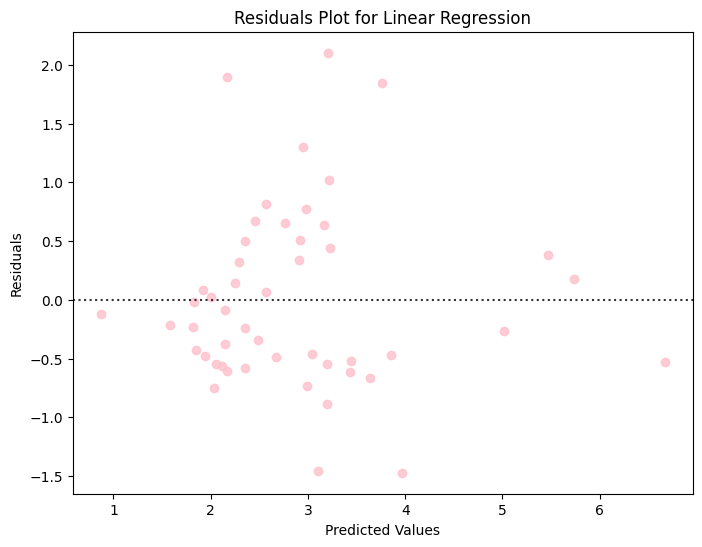

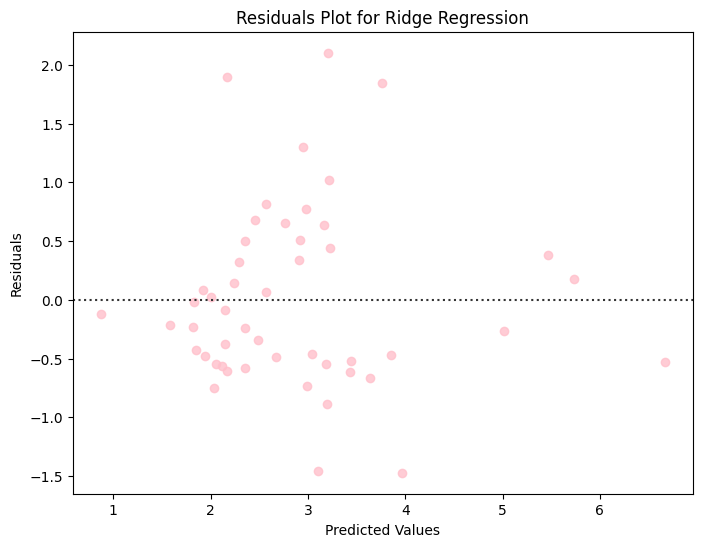

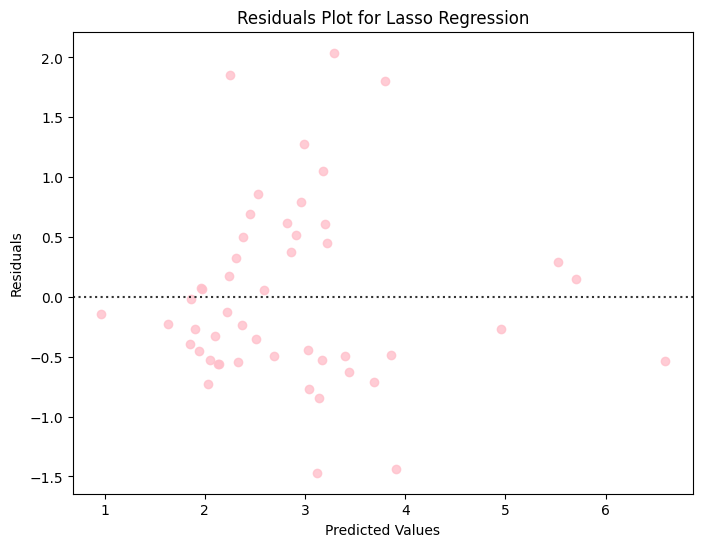

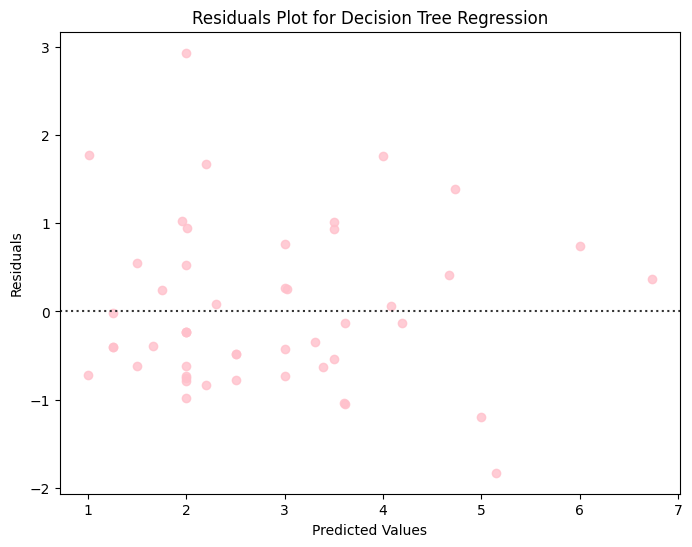

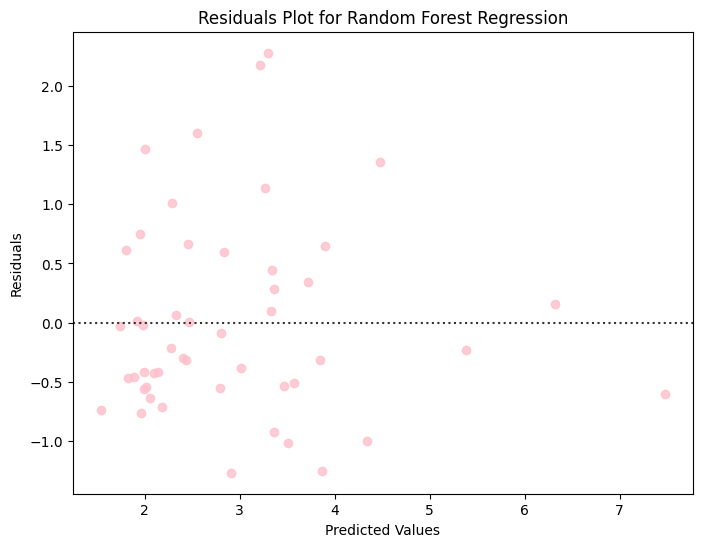

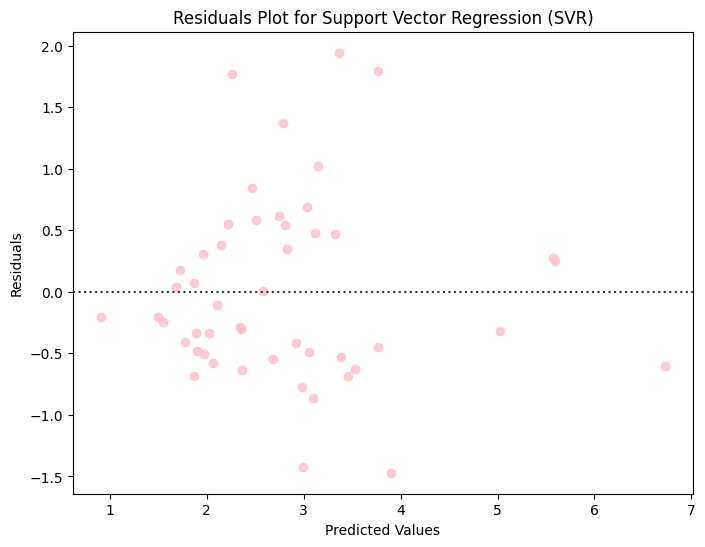

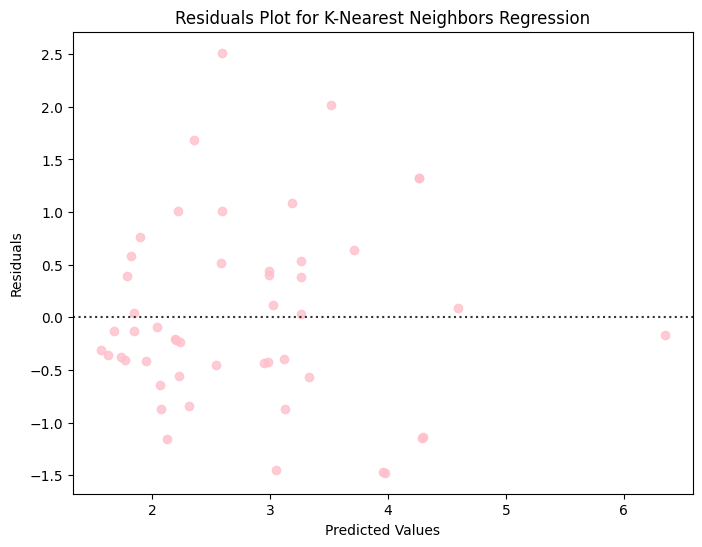

In [80]:
def plot_residuals_graphs(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_pred, y=residuals,  color="pink")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_linear_reg = linear_reg.predict(X_test)
plot_residuals_graphs(y_test, y_pred_linear_reg, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge.predict(X_test)
plot_residuals_graphs(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso_reg = lasso_reg.predict(X_test)
plot_residuals_graphs(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree.predict(X_test)
plot_residuals_graphs(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest.predict(X_test)
plot_residuals_graphs(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals_graphs(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn.predict(X_test)
plot_residuals_graphs(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

To improve sales, the company can target male customers with tailored promotions, as they tend to tip more.
Boosting dinner sales with evening deals and promoting Sundays with family specials can capitalize on higher spending times.
Weekend-only offers, like Saturday specials, could also attract more customers.